# Example 1

Plot pH over Time for the NEON Studies.

In [91]:
import requests
import json
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt


In [11]:
base_url = "https://api.microbiomedata.org"
filt = "name.search%3ANational%20Ecological%20Observatory%20Network"
url = f"{base_url}/studies?filter={filt}"
print(url)
resp = requests.get(url)
studies = resp.json()['results']
study_ids = []
for study in studies:
    print(study['id'])
    study_ids.append(study['id'])

https://api.microbiomedata.org/studies?filter=name.search%3ANational%20Ecological%20Observatory%20Network
nmdc:sty-11-34xj1150
nmdc:sty-11-hht5sb92
nmdc:sty-11-pzmd0x14


In [40]:
per_page = 100
all_results = []
fields = "ph, collection_date.has_raw_value,geo_loc_name,lat_lon"
for study_id in study_ids:
    filt = f"part_of:{study_id}"
    get_more = True
    tot = 0
    page = 1
    while get_more:
        url = f"{base_url}/biosamples?filter={filt}&per_page={per_page}&page={page}&fields={fields}"
        resp = requests.get(url)
        data = resp.json()
        results = data['results']
        for samp in results:
            if 'ph' in samp:
                all_results.append(samp)         
        tot += len(data['results'])
        if tot < data['meta']['count']:
            page += 1
        else:
            get_more = False

print(len(all_results))


4259


In [52]:
sites = set()
geo_locs = set()
dates = set()
for samp in all_results:
    lat_lon = f"{samp['lat_lon']['latitude']},{samp['lat_lon']['longitude']}"
    sites.add(lat_lon)
    geo_locs.add(samp['geo_loc_name']['has_raw_value'])
    dates.add(samp['collection_date']['has_raw_value'])
print(len(sites))
print(len(geo_locs))
print(len(dates))

490
47
4091


In [53]:
print(all_results[0])

{'collection_date': {'has_raw_value': '2017-06-05T16:50Z'}, 'id': 'nmdc:bsm-11-06qrej20', 'ph': 5.51, 'geo_loc_name': {'has_raw_value': 'USA: Washington, Abby Road'}, 'lat_lon': {'latitude': 45.76858, 'longitude': -122.298736}}


In [95]:
df_inp = []
for samp in all_results:
    year, month, day = samp["collection_date"]["has_raw_value"][0:10].split("-")
    lat_lon = f"{samp['lat_lon']['latitude']},{samp['lat_lon']['longitude']}"

    rec = {"date": samp["collection_date"]["has_raw_value"],
           "ph": samp["ph"],
           "loc": samp["geo_loc_name"]["has_raw_value"],
           "lat_lon": lat_lon}
    df_inp.append(rec)

df = pd.DataFrame(df_inp)
df['date'] = pd.to_datetime(df['date'])


In [89]:
df['date'].dtypes

datetime64[ns, UTC]

SyntaxError: f-string: unmatched '[' (2000085477.py, line 1)

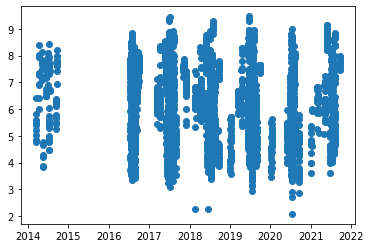

In [96]:

plt.plot_date(df.date, df.ph)